<center>

# Weapon Detection  (Classification) - mobileNet V3

</center>

<h1 style="text-align: center;">Transfer Learning</h1>


- Transfer learning reuses pre-trained models for related tasks.
- It accelerates training, requires less data, and improves performance.
- It's effective when tasks share features or data distributions.


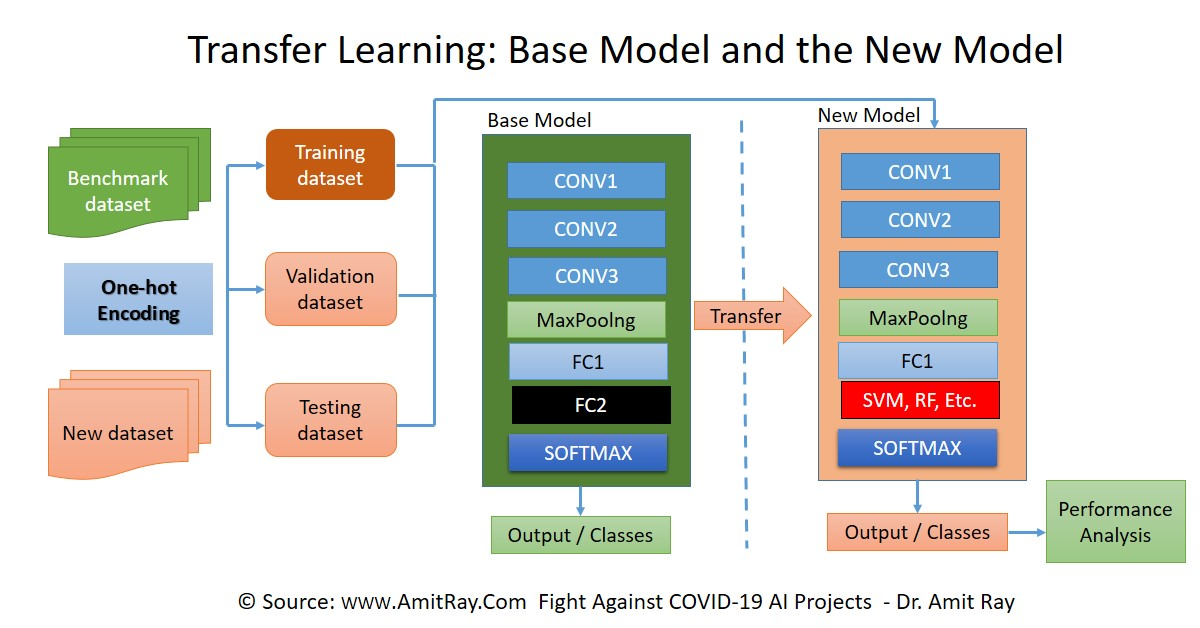

Required Imports

In [1]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split, KFold
import timm
import time
import pathlib
from torchvision.datasets import ImageFolder


c:\S4\ML\Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Since we are dealing with images, they may have different shapes.
- Resizing all the images is necessary to train our model for better accuracy.


In [2]:
IMAGE_SHAPE = (224, 224) # 224*224 is the standard image size taken here.

- Pretrained Model --> mobileNet_v2
- Developed by tensorflow

In [3]:
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(HubLayer, self).__init__(**kwargs)
        self.hub_layer = hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/2", input_shape=IMAGE_SHAPE+(3,))

    def call(self, inputs):
        return self.hub_layer(inputs)

# Create a Sequential model and add the custom HubLayer
classifier = tf.keras.Sequential([
    HubLayer()
])

<center>Example : Humming Bird</center>

<center>

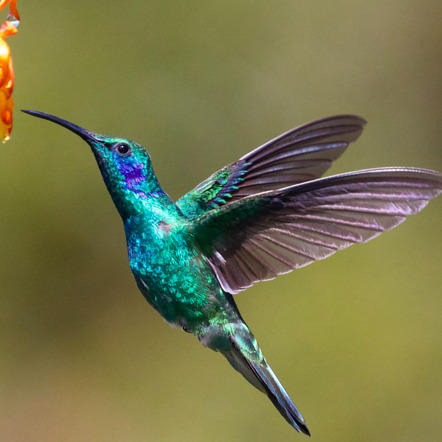

</center>

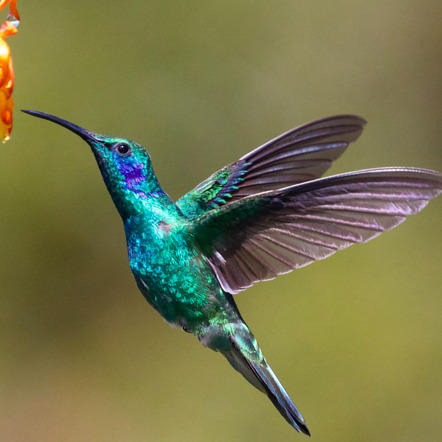

In [4]:
hmgbrd = Image.open("./mdimgs/hmgbrd.jpeg")
hmgbrd

In [5]:
hmgbrd = np.array(hmgbrd.resize(IMAGE_SHAPE)) / 255.0
hmgbrd.shape

(224, 224, 3)

In [6]:
hmgbrd[np.newaxis, ...]   #adding a new dimension for conv

array([[[[0.88627451, 0.76862745, 0.53333333],
         [1.        , 0.91372549, 0.57254902],
         [0.98823529, 0.61176471, 0.12156863],
         ...,
         [0.50196078, 0.44705882, 0.30980392],
         [0.50196078, 0.43921569, 0.29803922],
         [0.49411765, 0.43921569, 0.30196078]],

        [[0.99215686, 0.86666667, 0.63529412],
         [0.99215686, 0.72941176, 0.2745098 ],
         [0.98431373, 0.39607843, 0.        ],
         ...,
         [0.50196078, 0.44313725, 0.30588235],
         [0.49803922, 0.43529412, 0.29411765],
         [0.49411765, 0.43137255, 0.29803922]],

        [[1.        , 0.69803922, 0.30196078],
         [0.98823529, 0.45490196, 0.01176471],
         [0.96862745, 0.36078431, 0.01176471],
         ...,
         [0.49803922, 0.43529412, 0.29803922],
         [0.49411765, 0.43137255, 0.29019608],
         [0.49411765, 0.43137255, 0.29803922]],

        ...,

        [[0.63921569, 0.5254902 , 0.38823529],
         [0.63137255, 0.5254902 , 0.38823529]

In [7]:
result = classifier.predict(hmgbrd[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 1001)

In [8]:
predicted_label_ind = np.argmax(result)
predicted_label_ind

95

In [9]:
image_labels = []
with open("datasets/ImageNetLabels1.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_ind]

'hummingbird'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
741


'power drill'

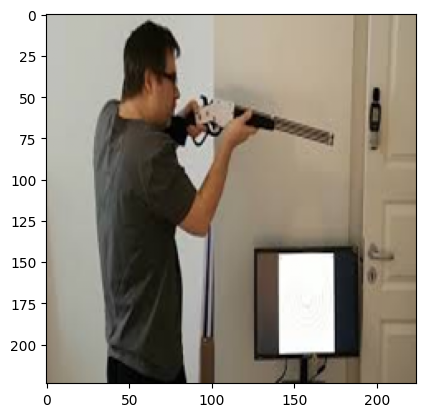

In [50]:
IMAGE_SHAPE = (224, 224)
gun = Image.open("./datasets/download.jpeg")
gun = np.array(gun.resize(IMAGE_SHAPE)) / 255
gun.shape
plt.imshow(gun)
image_labels = []
with open("datasets/ImageNetLabels1.txt", "r") as f:
    image_labels = f.read().splitlines()

result = classifier.predict(gun[np.newaxis, ...])
predicted_label_ind = np.argmax(result)
print(predicted_label_ind)
image_labels[predicted_label_ind]

# Training Our Model using MobileNetV2

In [11]:
data_dir = "./datasets/weapons/withoutLabel"
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/weapons/withoutLabel')

In [12]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/0034d5bf3d7f4477.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/0044996148ade7df.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/00d4e4bdc3d148b0.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/0102c32ad755788e.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/01e2336beebfa72b.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/029544e103e0c404.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/02b8c52b09368cdd.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/03240a00e2bb5b2a.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/035f3ec2b32dd8af.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/036975bdd89220a4.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/046e22e0656d8fdf.jpg'),
 WindowsPath('datasets/weapons/withoutLabel/Bow and arrow/04952c31850b82ee.jpg'),
 WindowsPath('da

In [13]:
len(list(data_dir.glob('*/*.jpg')))

4038

In [14]:
Handgun = list(data_dir.glob('Handgun/*'))
# Image.open(str(Handgun[7]))

In [15]:
weapons_images_dict = {
    'Handgun' : list(data_dir.glob('Handgun/*')),
    'Shotgun' : list(data_dir.glob('Shotgun/*')),
    'Bow and arrow' : list(data_dir.glob('Bow and arrow/*')),
    'Knife':list(data_dir.glob('Knife/*')),
    'Sword':list(data_dir.glob('Sword/*')),
    'Rifle' : list(data_dir.glob('Rifle/*')),
}

In [16]:
#Label encoding
weapons_label_dict = {
    'Handgun' : 0,
    'Shotgun' : 1,
    'Bow and arrow' : 2,
    'Knife': 3,
    'Sword':4,
    'Rifle':5,
}


In [17]:
IMAGE_SHAPE = (224, 224)
X,y = [],[]

for weapnName, imgs in weapons_images_dict.items():
    for img in imgs:
        img1 = cv2.imread(str(img))
        if img1 is None:
            print("Failed to parse : ",img)
            continue
        resImg = cv2.resize(img1,IMAGE_SHAPE)
        X.append(resImg)
        y.append(weapons_label_dict[weapnName])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [20]:
Xtrain_scaled = X_train/255
Xtest_scaled = X_test/255


In [21]:
pre_trained_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/2"
pretrained_model_without_top_layer = hub.KerasLayer(pre_trained_model, input_shape=(224, 224, 3), trainable=False)

In [22]:
import tf_keras as tfk

model = tfk.Sequential([
  pretrained_model_without_top_layer,
  tfk.layers.Dense(6)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 3546277 (13.53 MB)
Trainable params: 6012 (23.48 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

model.fit(Xtrain_scaled,y_train,epochs=120)


Epoch 1/2



104/104 [==============================] - 45s 173ms/step - loss: 1.0589 - accuracy: 0.6519
Epoch 2/2
104/104 [==============================] - 18s 173ms/step - loss: 0.5964 - accuracy: 0.7810


In [24]:
evaluation_metrics = model.evaluate(Xtest_scaled, y_test)

print("Evaluation Metrics:")
for metric_name, metric_value in zip(model.metrics_names, evaluation_metrics):
    print(f"{metric_name}: {metric_value}")

35/35 [==============================] - 7s 176ms/step - loss: 0.6943 - accuracy: 0.7586
Evaluation Metrics:
loss: 0.6943005323410034
accuracy: 0.758589506149292


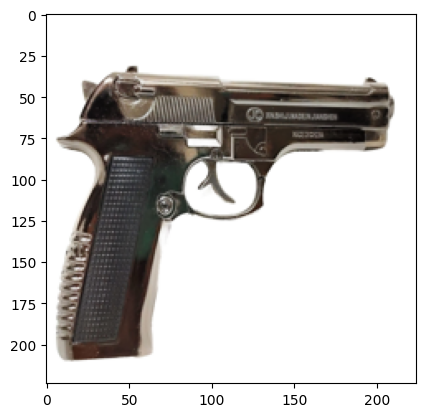

In [25]:
IMAGE_SHAPE = (224, 224)
gun = Image.open("./datasets/download1.jpg")
gun = np.array(gun.resize(IMAGE_SHAPE)) / 255
gun.shape
plt.imshow(gun)

In [26]:
predicted = model.predict(gun[np.newaxis, ...])
predicted

1/1 [==============================] - 1s 958ms/step


array([[ 3.5608854,  0.8982022, -2.5591319, -2.60523  , -4.8917565,
         0.6439298]], dtype=float32)

In [27]:
predicted_label_ind = np.argmax(predicted)
predicted_label_ind

0

In [28]:
image_labels = []
with open("datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
    

In [29]:
image_labels[predicted_label_ind]

'Handgun'

# Training Our Model using Xception

In [32]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.long)  # Ensure labels are LongTensors

In [33]:
# Image processing and dataset preparation
IMAGE_SHAPE = (224, 224)
NUM_EPOCHS = 5
NUM_CLASSES = 7

data_dir = pathlib.Path("./datasets/weapons/withoutLabel")

weapons_images_dict = {
    "Handgun": list(data_dir.glob("Handgun/*")),
    "Shotgun": list(data_dir.glob("Shotgun/*")),
    "Bow and arrow": list(data_dir.glob("Bow and arrow/*")),
    "Knife": list(data_dir.glob("Knife/*")),
    "Sword": list(data_dir.glob("Sword/*")),
    "Rifle": list(data_dir.glob("Rifle/*")),
    "No weapons": list(data_dir.glob("No weapons/*")),
}

weapons_label_dict = {
    "Handgun": 0,
    "Shotgun": 1,
    "Bow and arrow": 2,
    "Knife": 3,
    "Sword": 4,
    "Rifle": 5,
    "No weapons": 6,
}

In [34]:
image_paths, labels = [], []

for weapon_name, imgs in weapons_images_dict.items():
    for img in imgs:
        image_paths.append(str(img))
        labels.append(weapons_label_dict[weapon_name])

transform = transforms.Compose([
    transforms.Resize(IMAGE_SHAPE),
    transforms.ToTensor(),
])

In [35]:
dataset = ImageFolder(".\datasets\weapons\withoutLabel",transform=transform)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
for fold, (train_index, val_index) in enumerate(kf.split(dataset)):
    print(f"Training fold {fold+1}...")

    train_subsampler = torch.utils.data.SubsetRandomSampler(train_index)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_index)

    train_loader = DataLoader(dataset, batch_size=32, sampler=train_subsampler,num_workers=4,pin_memory=True)
    val_loader = DataLoader(dataset, batch_size=32, sampler=val_subsampler,num_workers=4,pin_memory=True)

    model = timm.create_model('xception', pretrained=True, num_classes=len(weapons_label_dict))
    model = model.to(device, non_blocking = True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.to(device, non_blocking = True)
            labels = labels.to(device, non_blocking = True).long()  # Ensure labels are LongTensors

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device, non_blocking = True)
                labels = labels.to(device, non_blocking = True).long()  # Ensure labels are LongTensors

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}")

    # Save the model for each fold
    torch.save(model.state_dict(), f"xception_fold{fold+1}.pth")

Loading the model and Predicting

In [40]:
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import timm

# Define the class labels
weapons_label_dict = {
    0: "Handgun",
    1: "Shotgun",
    2: "Bow and arrow",
    3: "Knife",
    4: "Sword",
    5: "Rifle",
    6: "No weapons",
}

# Function to load the model
def load_model(model_path, num_classes=7):
    model = timm.create_model('xception', pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()  # Set model to evaluation mode
    return model

# Function to preprocess the input image
def preprocess_image(image_path, image_shape=(224, 224)):
    transform = transforms.Compose([
        transforms.Resize(image_shape),
        transforms.ToTensor(),
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Function to predict the class of the image
def predict_image(model, image_tensor, device):
    image_tensor = image_tensor.to(device)
    outputs = model(image_tensor)
    _, predicted = torch.max(outputs.data, 1)
    return predicted.item()

# Load the model
model_path = 'xception_fold4.pth'  # Replace with the path to your saved model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model(model_path)
model = model.to(device)

# Preprocess the image
image_path = './testt/test4.jpeg'  # Replace with the path to the image you want to predict
image_tensor = preprocess_image(image_path)

# Predict the image
predicted_class_idx = predict_image(model, image_tensor, device)
predicted_class = weapons_label_dict[predicted_class_idx]

print(f"The predicted class is: {predicted_class}")


The predicted class is: Sword


# References

https://keras.io/guides/transfer_learning/